# Worksheet 8

## 1. You ask your roommate to water a sickly plant while you are on vacation. Without water the plant will die with probability 0.8 and with water it will die with probability 0.1. With probability 0.85, your roommate will remember to water the plant.

In [2]:
ProbWater <- .85
ProbNoWater <- .15

ProbDead_GivenNoWater <- .8
ProbDead_GivenWater <- .1

ProbLiving_GivenWater <- .9
ProbLiving_GivenNoWater <- .2

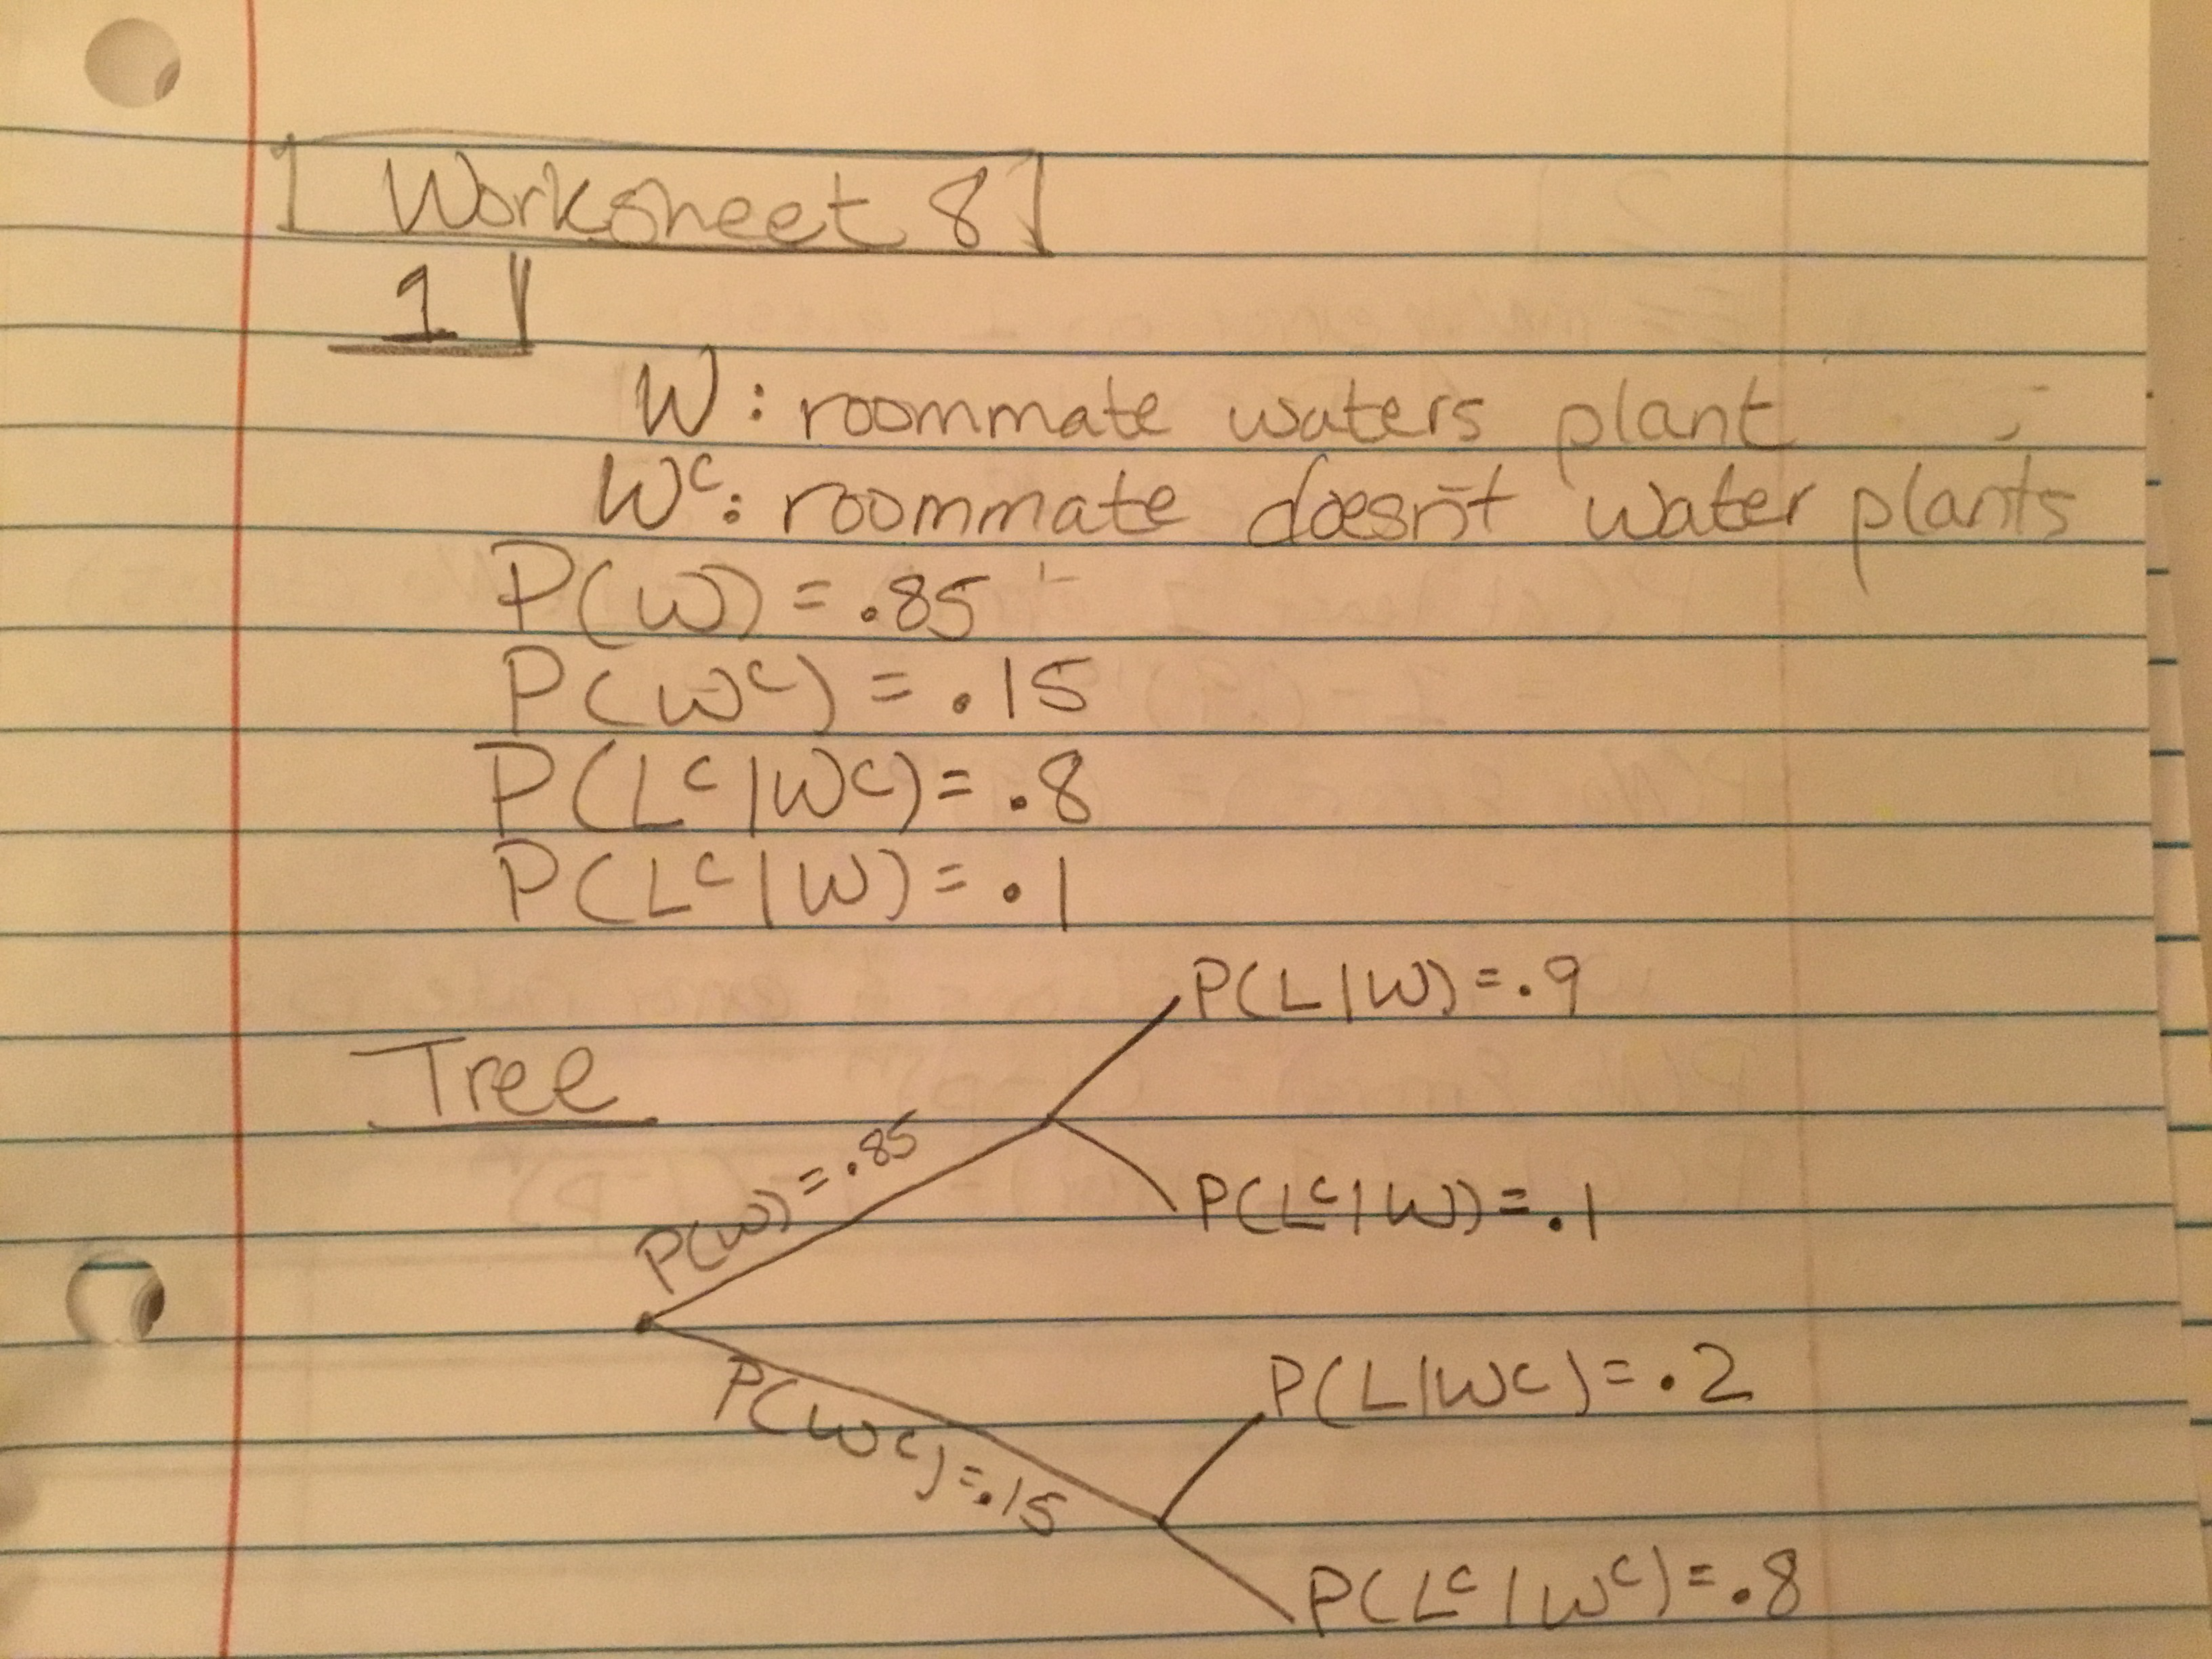

### (a) What is the probability that your plant is alive when you return? (You may use a tree diagram.)

In [3]:
ProbLiving <- ProbLiving_GivenWater*ProbWater + ProbLiving_GivenNoWater*ProbNoWater
cat('The probability that my plant is alive when I return is', ProbLiving)

The probability that my plant is alive when I return is 0.795

### (b) If the plant is alive when you return, what is the probability that your roommate remember to water it?

#### Baye's Theorem:
### P(A|B)=(P(B|A)P(A))/P(B)

In [4]:
ProbWatered_GivenLiving <- ProbLiving_GivenWater*ProbWater/ProbLiving
cat('The probability of the plant having been watered given that it is found to be alive is', ProbWatered_GivenLiving)

The probability of the plant having been watered given that it is found to be alive is 0.9622642

## 2. The probability that a grader will make a marking error on any particular question of a multiple choice exam is 0.1.

In [5]:
Prob_Correct <- .9
Prob_Incorrect <- .1

### (a) If there are 10 questions and questions are marked independently, what is the probability that no errors are made?

In [6]:
numberOfQuestions = 10
ProbAllCorrect <- Prob_Correct**numberOfQuestions
cat('The probability of no errors is', ProbAllCorrect)

The probability of no errors is 0.3486784

### (b) That at least one error is made?

In [7]:
# Same as 1 - P(no errors)
# P(no errors was calculated above)
ProbAtLeast1Incorrect <- 1 - ProbAllCorrect
cat('The probability of at least one errer is ', ProbAtLeast1Incorrect)

The probability of at least one errer is  0.6513216

### (c) If there are n questions and the probability of making error is p rather than 0.1, give expressions for these two probabilities.

    (i) P(NoErrors) = P(Correct)^n

In [8]:
ProbNoErrors <- function(probabilityOfFailure, numberOfQuestions)
{
    return ((1-probabilityOfFailure)**numberOfQuestions)
} 

In [9]:
cat('The probability of no errors is', ProbNoErrors(.1, 10))

The probability of no errors is 0.3486784

    (ii) P(At Least 1 Error) = 1 - P(NoErrors)

In [10]:
# @args p - probability of failure
# @args n - number of questions
ProbAtLeast1Error <- function(p, n)
{
    return (1- ProbNoErrors(p, n))
}

In [11]:
cat('The probability of at least one errer is ', ProbAtLeast1Error(.1, 10))

The probability of at least one errer is  0.6513216

## 3. A sample random sample of size n=3 is drawn from a batch of ten product items. If three of the 10 items are defective

### (a) find the PMF of the random variable X={number of defective items in the sample}.

In [12]:
NTotal = 10
NDefective = 3
NWorking = 7
SampleSize = 3

ProbZero = choose(NWorking, SampleSize)/choose(NTotal, SampleSize)
ProbOne = choose(NWorking, SampleSize-1)*choose(NDefective, SampleSize-2)/choose(NTotal, SampleSize)
ProbTwo = choose(NWorking, SampleSize-2)*choose(NDefective, SampleSize-1)/choose(NTotal, SampleSize)
ProbThree = choose(NWorking, SampleSize-3)*choose(NDefective, SampleSize)/choose(NTotal, SampleSize)

DefectPopulation = c(0, 1, 2, 3)
DefectProb = c(ProbZero, ProbOne, ProbTwo, ProbThree)

In [13]:
PofX <- function(x)
{
    if (x == 0)
    {
        return (ProbZero)
    }
    if (x == 1)
    {
        return (ProbOne)
    }
    if (x == 2)
    {
        return (ProbTwo)
    }
    if (x == 3)
    {
        return (ProbThree)
    }
    else
    {
        return (0.0)
    }
}

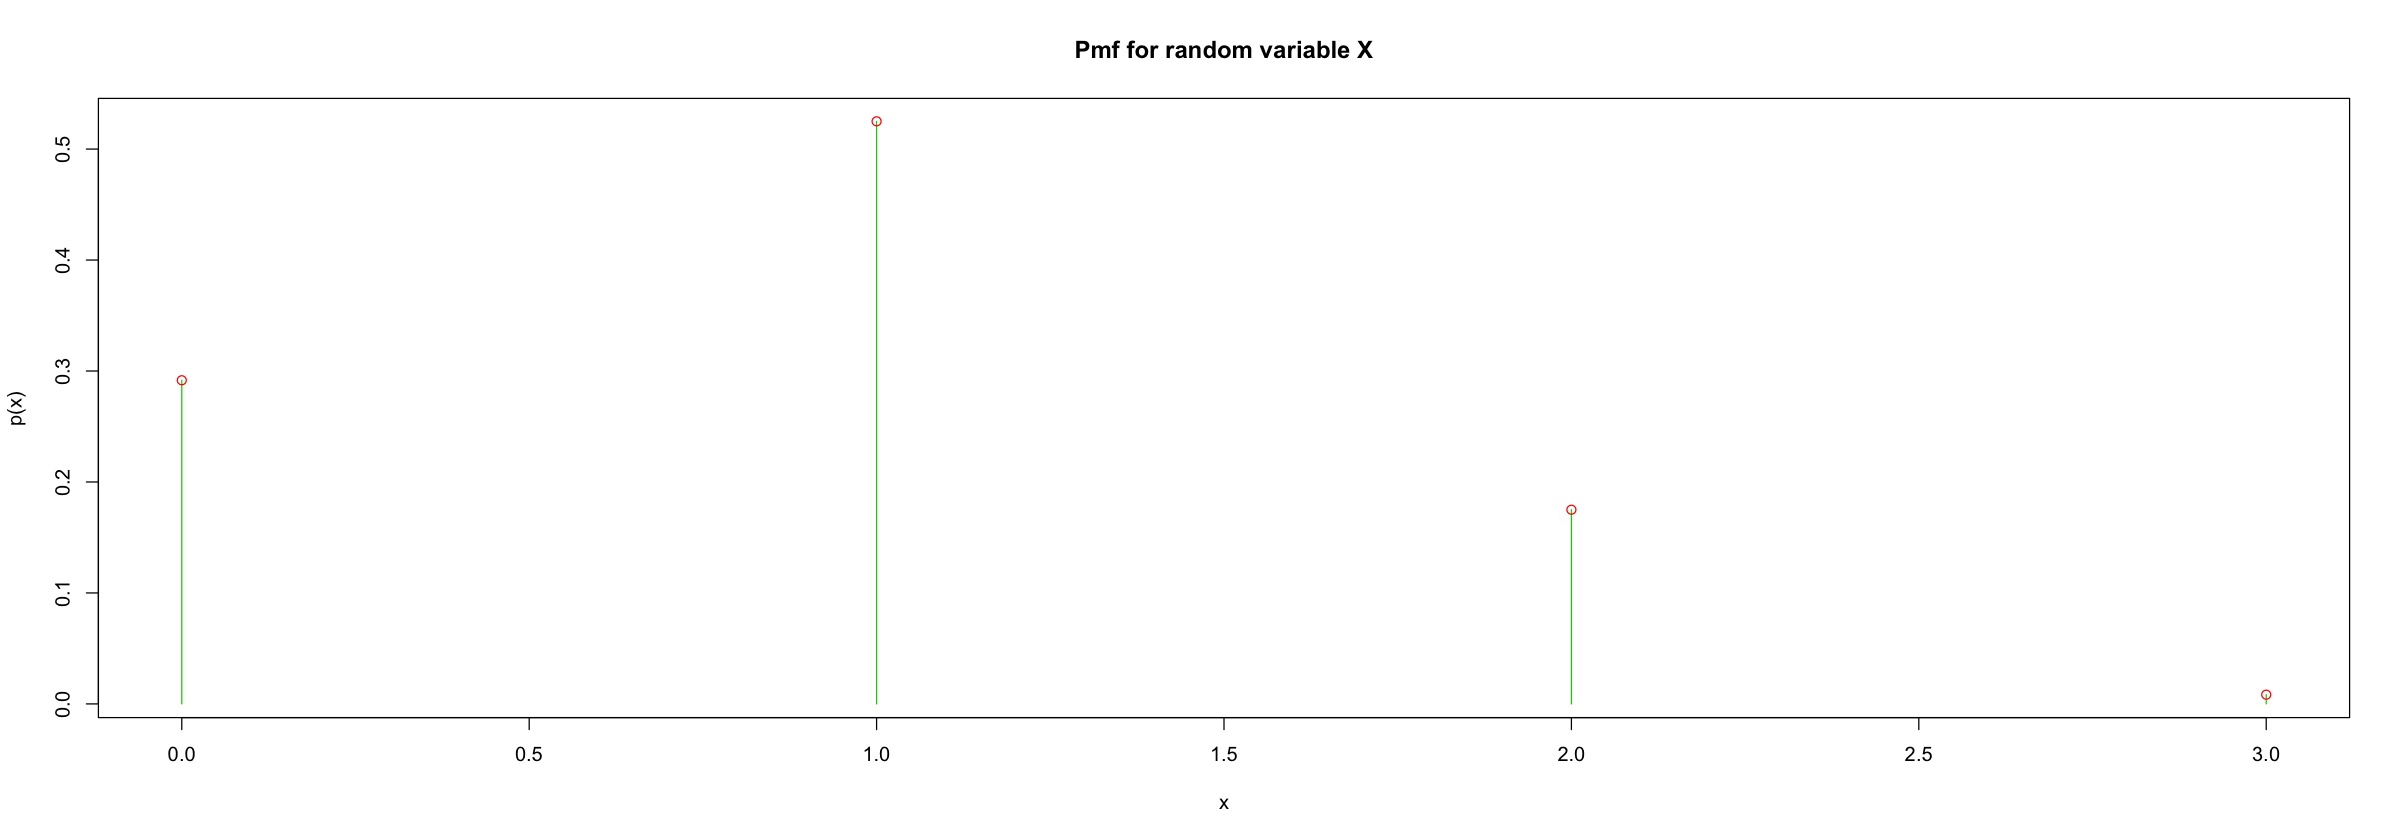

In [15]:
options(repr.plot.width = 20, repr.plot.height = 7)
plot(DefectPopulation, DefectProb, type="h", col=3, main="Pmf for random variable X", xlab="x", ylab="p(x)")
points(DefectPopulation, DefectProb, col=2)

# Simulation illustrating validity of PMF

In [16]:
#counts defects in list
#linear search O(n)

countDefects = function(sequence)
{
    numDefects = 0
    
    for (i in 1:length(sequence))
    {
        if (sequence[i] == 1)
        {
            numDefects <- numDefects + 1
        }
    }
    
    return (numDefects)
}

In [17]:
#zero means defective
iterations = 1000

numberDefective = c(rep(0,4))
for (i in 1:iterations)
{
    y = sample(x=c(rep(1,3), rep(0,7)), prob=c(rep(.1,10)), size=3, replace=T)
    
    if (countDefects(y) == 0)
    {
        numberDefective[1] = numberDefective[1] + 1
    }
    else if (countDefects(y) == 1)
    {
        numberDefective[2] = numberDefective[2] + 1
    }
    else if (countDefects(y) == 2)
    {
        numberDefective[3] = numberDefective[3] + 1
    }
    else if (countDefects(y) == 3)
    {
        numberDefective[4] = numberDefective[4] + 1
    }
}
simulatedDefectProbabilities = numberDefective/iterations

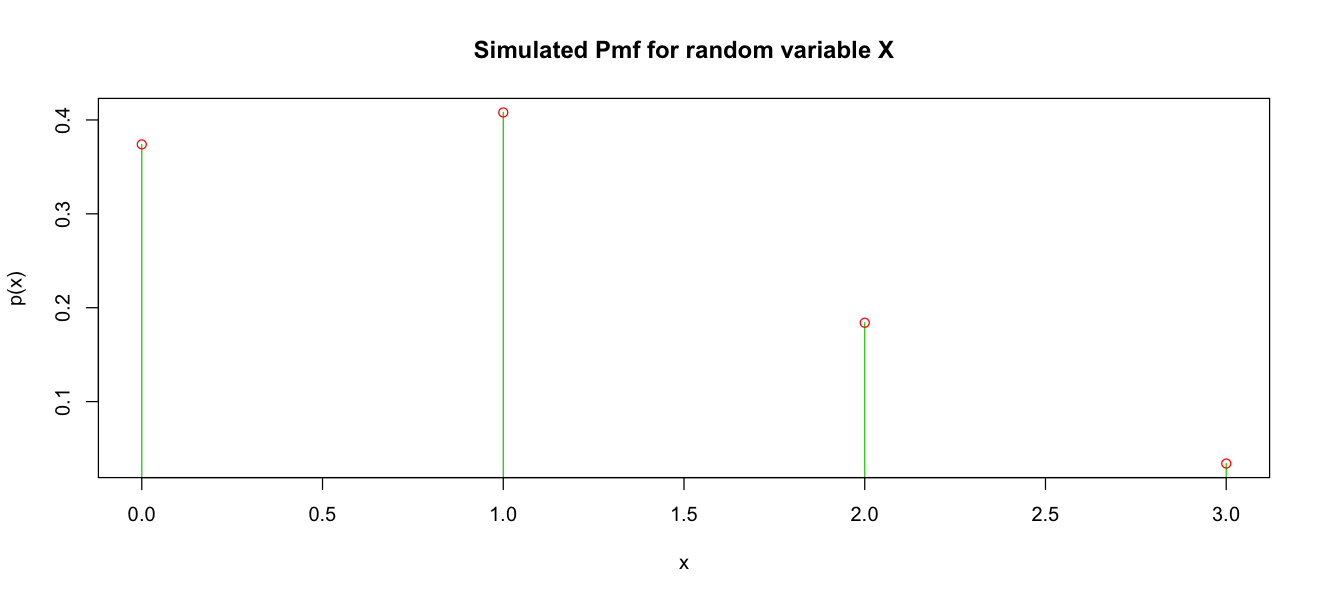

In [18]:
defectiveCategories = c(0,1,2,3)

options(repr.plot.width = 11, repr.plot.height = 5)
plot(x = defectiveCategories, y = simulatedDefectProbabilities, type="h", col=3, main="Simulated Pmf for random variable X", xlab="x", ylab="p(x)")
points(defectiveCategories, simulatedDefectProbabilities, col=2)

### (b) Find the CDF of the random variable X={number of defective items in the sample}.

In [17]:
# cumulates probabilities
CumulativeDefectProb = cumsum(DefectProb)

FofX <- function(x)
{
    if (x < 0)
    {
        return (0.0)
    }
    if (x >= 0 && x < 1)
    {
        return (CumulativeDefectProb[1])
    }
    if (x >= 1 && x < 2)
    {
        return (CumulativeDefectProb[2])
    }
    if (x >= 2 && x < 3)
    {
        return (CumulativeDefectProb[3])
    }
    else
    {
        return (CumulativeDefectProb[4])
    }
}

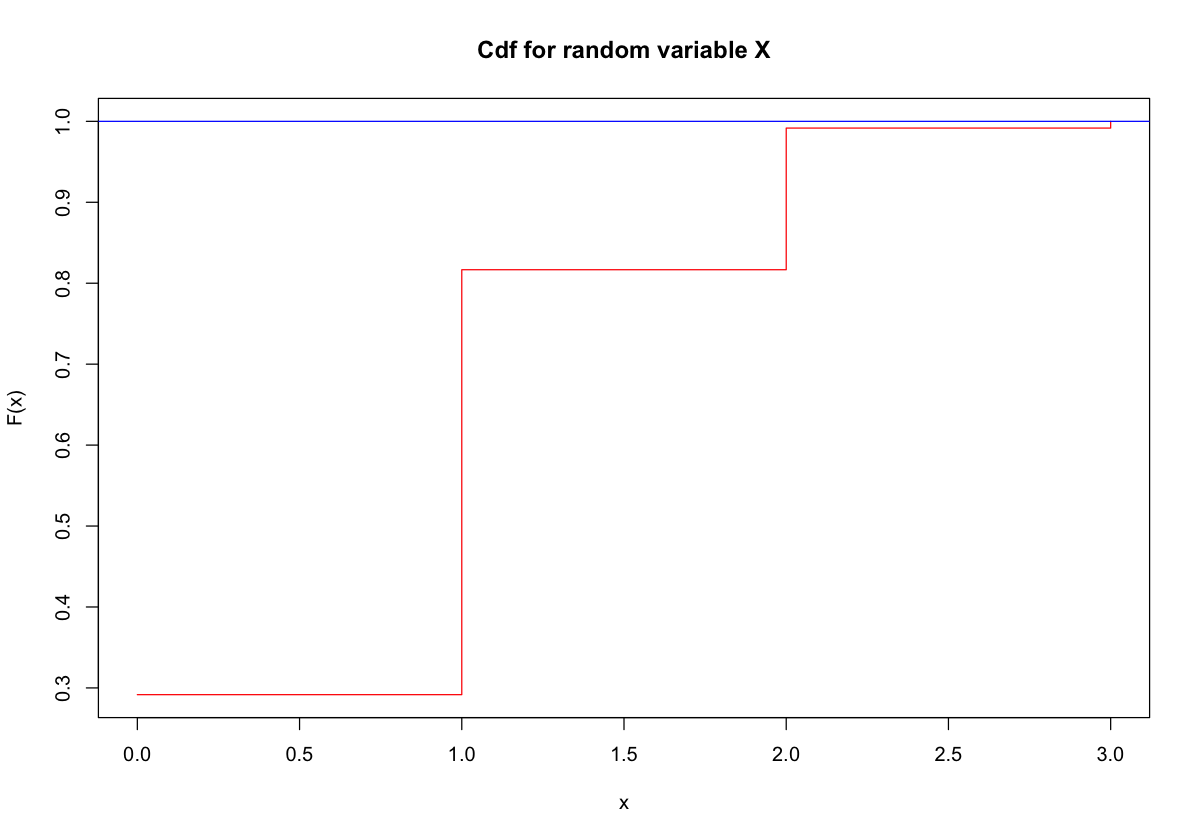

In [18]:
options(repr.plot.width = 10, repr.plot.height = 7)
plot(DefectPopulation,CumulativeDefectProb,type="s", ylab="F(x)",col=2,xlab="x", main="Cdf for random variable X");
abline(h=0:1,col=4)

## 4. cumulative distribution function of checkout duration X, measured in minutes, in a certaing supermarket is:
    F(x) = x^2/4  for 0 > x <= 2,
    F(x) = 0      for x <= 0,
    F(x) = 1      for x > 2

### (a) Find the probability that the duration is between 0.5 and 1 minute.

In [19]:
FofX <- function(x)
{
    if (x <= 0)
    {
        return (0.0)
    }
    else if (x > 2)
    {
        return (1.0)
    }
    else
    {
       return ((x^2)/4.0) 
    }
}

In [20]:
ProbHalfToOne = FofX(1)- FofX(.5)

In [21]:
cat(ProbHalfToOne*100, '% of checkouts fail in the .5 to 1 minute range')

18.75 % of checkouts fail in the .5 to 1 minute range

#### (b) Find the probability density function f(x)

In [22]:
PofX <- function(x)
{
    if (x <= 0)
    {
        return (0.0)
    }
    else if (x > 2)
    {
        return (0.0)
    }
    else
    {
        return (x/2)
    }
}

#### (c) Let Y denote the checkout duration measured in seconds. Find the CDF and PDF of Y.

    (i)
    
    F(y) = (y/60)^2/4 for 0 > y <= 120,
    F(y) = 0          for y <= 0,
    F(y) = 1          for y > 120
    
    (ii)
    
    P(y) = (y/30)    for for 0 > y <= 120,
    P(y) = 0         otherwise

### 5. In a certain factory, machines I, II, and III are all producing springs of the same length. Machine I, II and III produce 1%, 4%, and 2% defective springs, respectively. Of the total production of springs in the factory, Machine I produces 30%, Machine II produces 25%, and Machine III produces 45%.

In [23]:
ProbM1 = .3
ProbM2 = .25
ProbM3 = .45

ProbD_GivenM1 = .01
ProbNoD_GivenM1 = .99
ProbD_GivenM2 = .04
ProbNoD_GivenM2 = .96
ProbD_GivenM3 = .02
ProbNoD_GivenM3 = .98

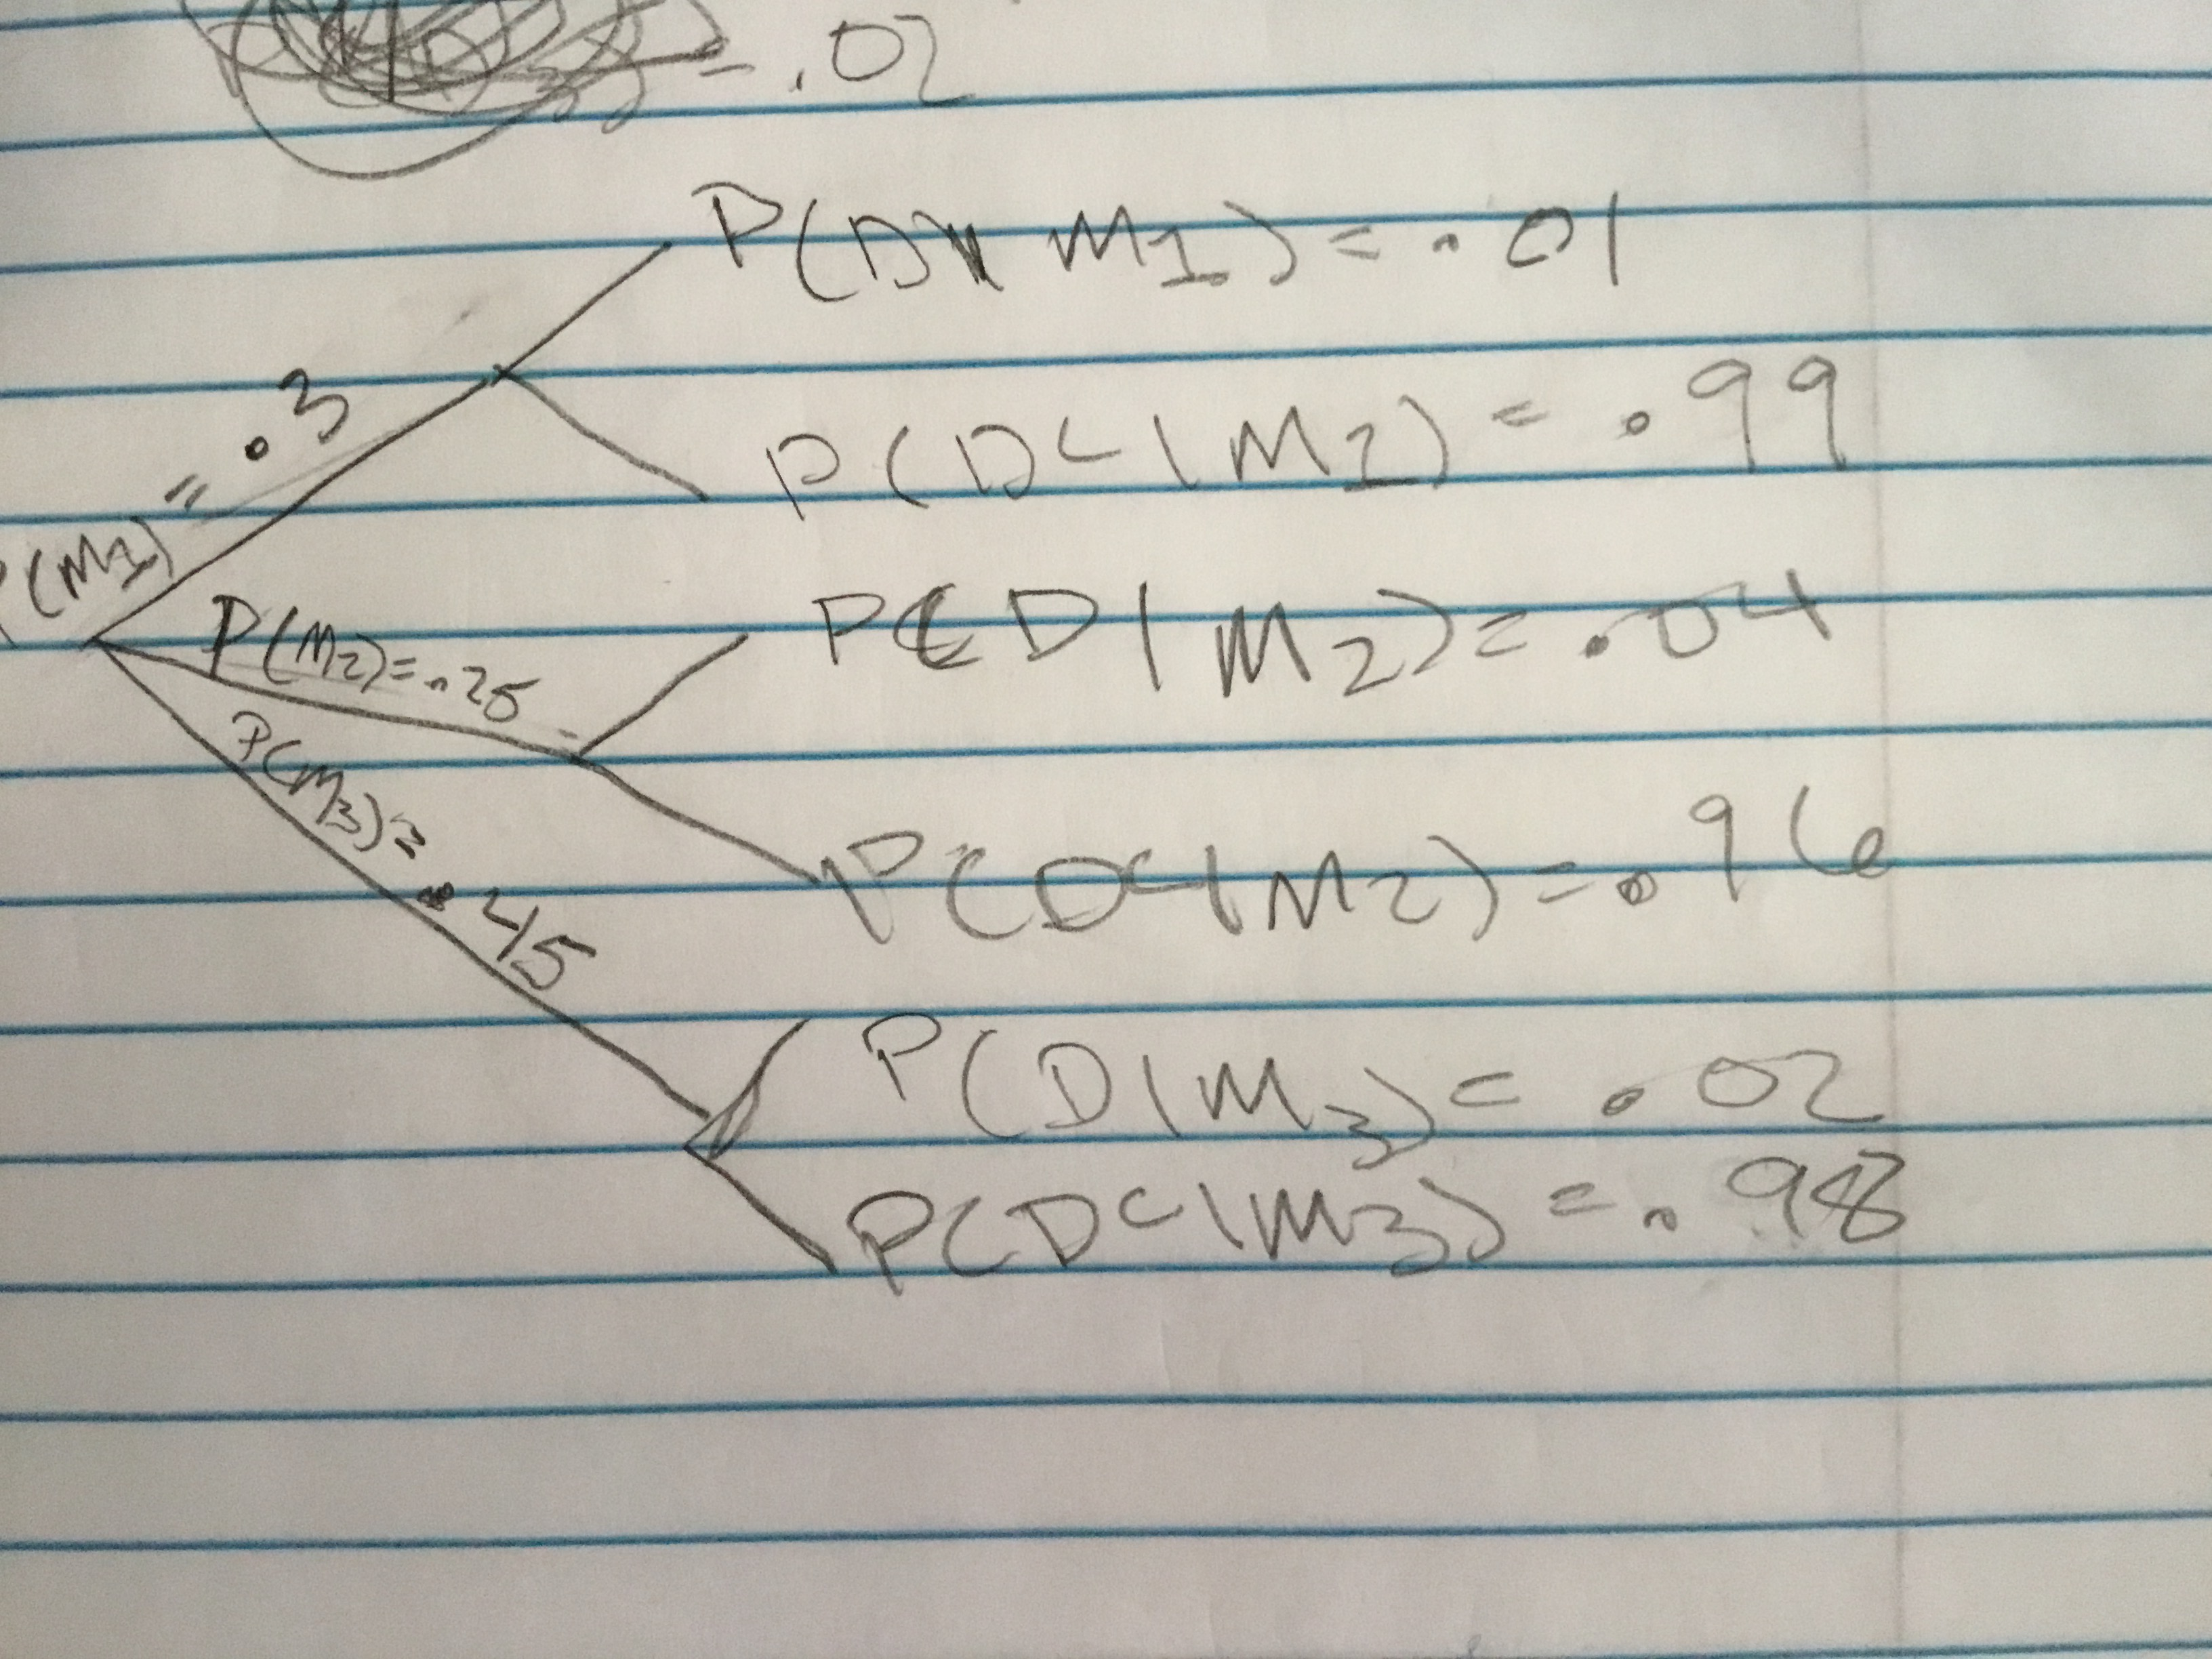

#### (a) If one spring is selected at random from the total springs produced in a given day, determine the probability that it is defective.

    P(D) = P(D|M1)P(M1) + P(D|M2)P(M2)

In [24]:
ProbDefective = ProbD_GivenM1*ProbM1 + ProbD_GivenM2*ProbM2
cat('The probability that a randomly selected spring is defective is', ProbDefective)

The probability that a randomly selected spring is defective is 0.013

#### (b) Given that the spring is defective, find the conditional probability that it was produced by Machine II.

#### Baye's Theorem:
### P(A|B)=(P(B|A)P(A))/P(B)

    P(M2|D) =(P(D|M2)P(M2))/P(D)

In [25]:
ProbM2_GivenD = ProbD_GivenM2*ProbM2/ProbDefective
cat('Given a defective spring, the probability it was produced by Machine II is', ProbM2_GivenD)

Given a defective spring, the probability it was produced by Machine II is 0.7692308

### 6. For each of the following, find the constant c so that p(x) satisfies the condition of being a pmf of one random variable X.

#### (a) p(x) = c(2/3)^x,     x = 1,2,··· , zero elsewere.

    c(2/3)+c(2/3)^2+c(2/3)^3....
    (2c/3)(1+(2/3)+(2/3^2)+....)
    (2c/3)(1/(1-2/3)) = 1
    (2c/3)(1/3) = 1
    2c = 1
    c = 1/2

#### (b) p(x) = cx, x = 1,2,3,4,5,6, zero elsewere.

    P(1)+P(2)+P(3)+P(4)+P(5)+P(6)=1
    c*1 + c*2 + c*3 + c*4 + c*5 + c*6 = 1
    c*(1+2+3+4+5+6) = 1
    c = 1/(21)

#### (c) Find CDF both parts (a) and (b).

    (i)

In [20]:
FofX <- function(x)
{
    if (x < 1)
    {
        return (0.0)
    }
    else
    {
        result = 0
        for (i in 1:floor(x))
        {
            result = result + (1/2)*(2/3)^i
        }
        return (result)
    }
}

    (ii)

In [19]:
FofX <- function(x)
{
    if (x < 1)
    {
        return (0.0)
    }
    if (x >= 1 && x < 2)
    {
        return (1/21)
    }
    if (x >= 2 && x < 3)
    {
        return (3/21)
    }
    if (x >= 3 && x < 4)
    {
        return (6/21)
    }
    if (x >= 4 && x < 5)
    {
        return (10/21)
    }
    if (x >= 5 && x < 6)
    {
        return (15/21)
    }
    if (x >= 6)
    {
        return (1.0)
    }
}